<a href="https://colab.research.google.com/github/virf96/Proyectos/blob/master/Python_Introducci%C3%B3n_a_las_series_temporales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the Packages

In [72]:
import pandas as pd 
import numpy as np
#import matplotlib.pyplot as plt 
#import seaborn as sns
#sns.set()

### Importing the Data

In [73]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/virf96/curso-series-temporales/master/1.%20Introduccion%20a%20las%20series%20temporales/Python/Index2018.csv")

In [74]:
df_comp = raw_csv_data.copy()

### Examining the Data

In [75]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [76]:
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [77]:
#Convertimos a formato fecha
df_comp.date = df_comp.date.astype(str)
df_comp.date=pd.to_datetime(df_comp.date)

In [78]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-07-01,469.90,2224.95,3445.98,18124.01
1,1994-10-01,475.27,2225.00,3440.58,18443.44
2,1994-11-01,474.13,2228.10,3413.77,18485.25
3,1994-12-01,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [79]:
#Extraemos año y mes
df_comp['year'] = pd.DatetimeIndex(df_comp['date']).year
df_comp['month'] = pd.DatetimeIndex(df_comp['date']).month

In [80]:
df_comp.head()

,date,spx,dax,ftse,nikkei,year,month
0,1994-07-01,469.90,2224.95,3445.98,18124.01,1994,7
1,1994-10-01,475.27,2225.00,3440.58,18443.44,1994,10
2,1994-11-01,474.13,2228.10,3413.77,18485.25,1994,11
3,1994-12-01,474.17,2182.06,3372.02,18793.88,1994,12
4,1994-01-13,472.47,2142.37,3360.01,18577.26,1994,1


In [81]:
df_comp['year'].unique

<bound method Series.unique of 0       1994
1       1994
2       1994
3       1994
4       1994
        ... 
6264    2018
6265    2018
6266    2018
6267    2018
6268    2018
Name: year, Length: 6269, dtype: int64>

In [82]:
df_comp.date

0      1994-07-01
1      1994-10-01
2      1994-11-01
3      1994-12-01
4      1994-01-13
          ...    
6264   2018-01-23
6265   2018-01-24
6266   2018-01-25
6267   2018-01-26
6268   2018-01-29
Name: date, Length: 6269, dtype: datetime64[ns]

In [83]:
#Veamos las diferencias entre los índices de los diferentes mercados en el resumen estadistico.
df_comp.describe()

,spx,dax,ftse,nikkei,year,month
count,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700,2005.540118,6.521614
std,487.586473,2754.361032,1145.572428,4043.122953,6.941629,3.450403
min,438.920000,1911.700000,2876.600000,7054.980000,1994.000000,1.000000
25%,990.671905,4069.350000,4486.100000,10709.290000,2000.000000,4.000000
50%,1233.420000,5773.340000,5662.430000,15028.170000,2006.000000,7.000000
75%,1459.987747,7443.070000,6304.250000,17860.470000,2012.000000,10.000000
max,2872.867839,13559.600000,7778.637689,24124.150000,2018.000000,12.000000


In [84]:
#Veamos que no haya valores faltantes entre los periodos a analizar
df_comp.isna()

,date,spx,dax,ftse,nikkei,year,month
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
6264,False,False,False,False,False,False,False
6265,False,False,False,False,False,False,False
6266,False,False,False,False,False,False,False
6267,False,False,False,False,False,False,False


In [85]:
#Sumamos el output para verificar que no haya TRUE
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
year      0
month     0
dtype: int64

In [86]:
df_comp.spx.isna().sum()

0

### Plotting the Data

In [87]:
import matplotlib.pyplot as plt

In [88]:
#indexamos las fechas para fines de visualización
df_comp.set_index("date", inplace=True)

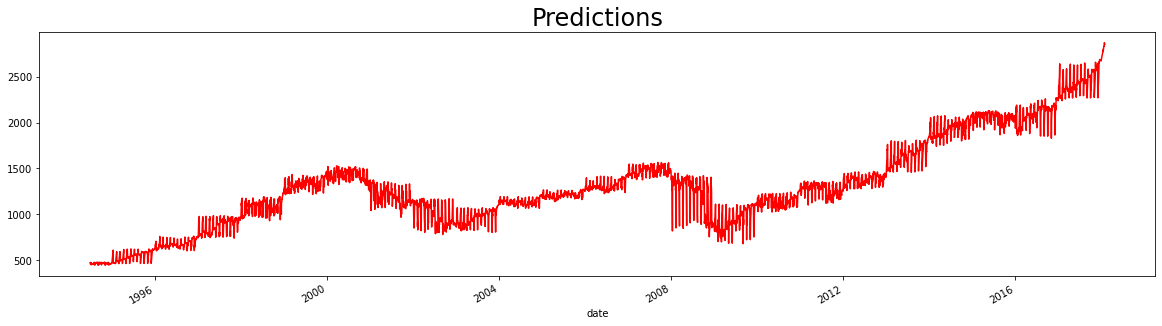

In [98]:
start_date = "1994-07-01"
end_date = "2018-01-29"
df_comp.spx[start_date:end_date].plot(figsize = (20,5), color = "red")
plt.title("Predictions", size = 24)
plt.show()

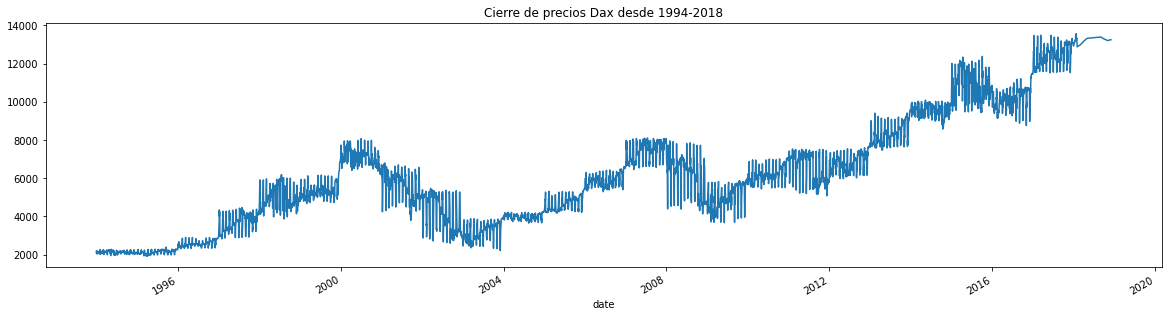

In [91]:
df_comp.dax.plot(figsize=(20,5), title = "Cierre de precios Dax desde 1994-2018")
plt.show()

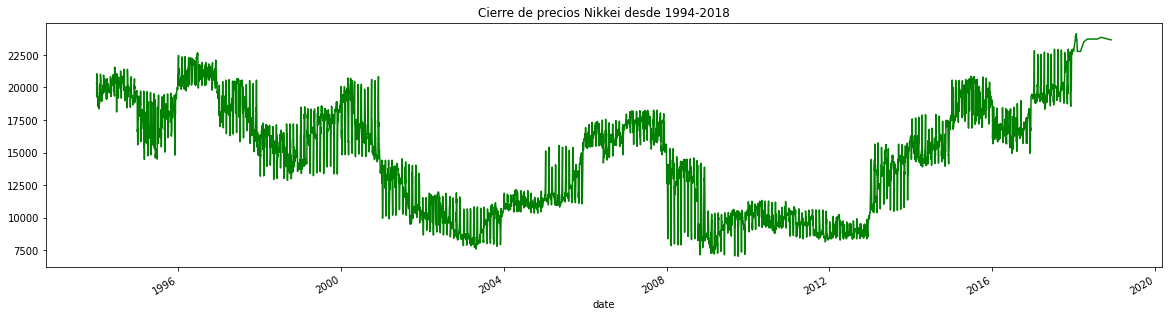

In [99]:
df_comp.nikkei.plot(figsize=(20,5), title = "Cierre de precios Nikkei desde 1994-2018",color='green')
plt.show()

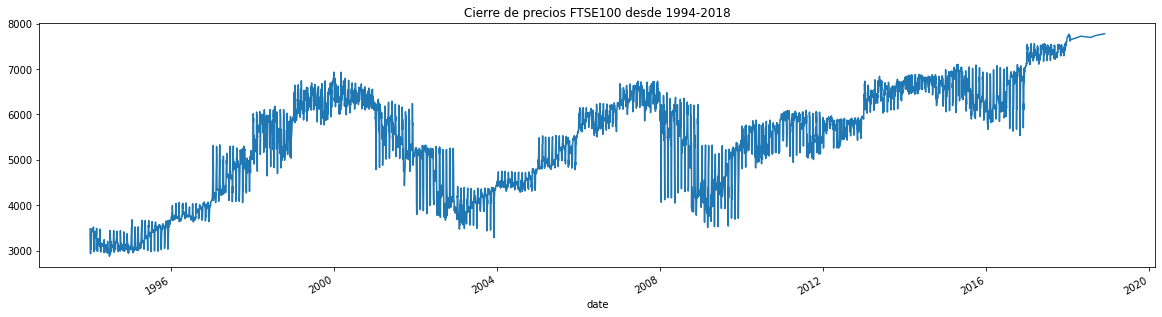

In [93]:
df_comp.ftse.plot(figsize=(20,5), title = "Cierre de precios FTSE100 desde 1994-2018")
plt.show()

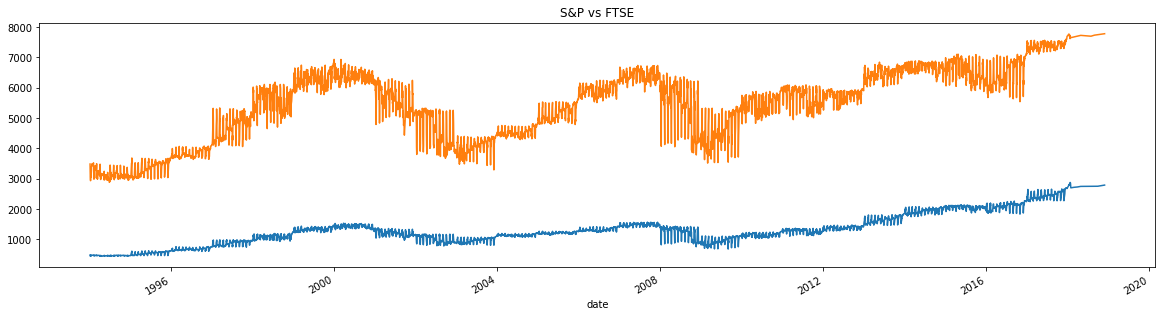

In [94]:
#Para poder compararlas habría que escalarlas, el gráfico aún es engañoso dado que aún estan en diferentes magnitudes.
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.title("S&P vs FTSE")
plt.show()

### The QQ Plot

In [95]:
import scipy.stats


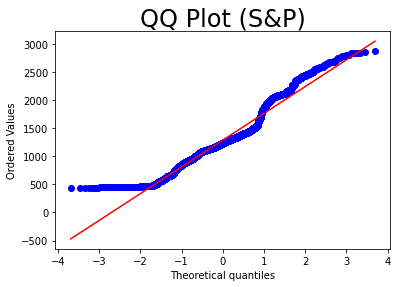

In [106]:
#QQ-PLOT para S&P
#Los datos son ordenados de menor a mayor
#Observamos que no hay precios negativos 
#Podemos ver que los datos no siguen una distribución normal.

scipy.stats.probplot(df_comp.spx, plot =  plt)
plt.title("QQ Plot (S&P)", size = 24)
plt.show()

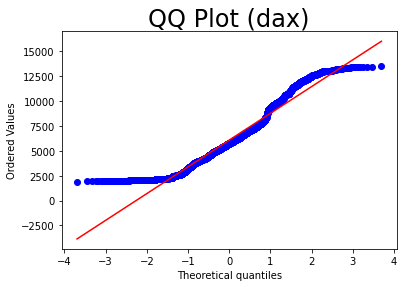

In [104]:
scipy.stats.probplot(df_comp.dax, plot =  plt)
plt.title("QQ Plot (dax)", size = 24)
plt.show()

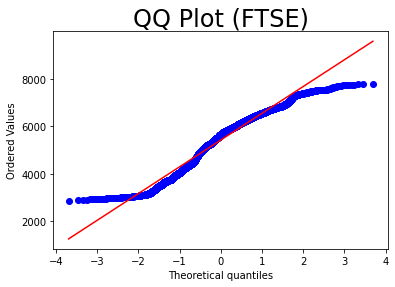

In [107]:
scipy.stats.probplot(df_comp.ftse, plot =  plt)
plt.title("QQ Plot (FTSE)", size = 24)
plt.show()

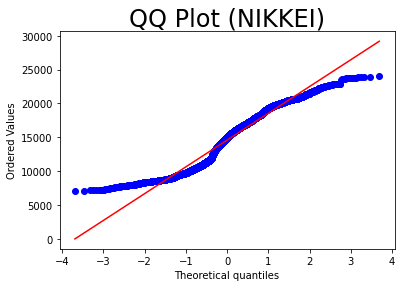

In [108]:
scipy.stats.probplot(df_comp.nikkei, plot =  plt)
plt.title("QQ Plot (NIKKEI)", size = 24)
plt.show()